In [84]:
# Step 1. Data Loading
import keras
import tensorflow as tf

In [85]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [86]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path='mnist.npz')

In [66]:
#reshaping x_train
X = x_train.reshape((60000, 28, 28, 1))
X = X.repeat(3, -1)  # repeat the last (-1) dimension three times
x_train = tf.convert_to_tensor(X)
assert x_train.shape == (60000, 28, 28, 3)

In [67]:
#reshaping x_test
X = x_test.reshape((10000, 28, 28, 1))
X = X.repeat(3, -1)  # repeat the last (-1) dimension three times
x_test = tf.convert_to_tensor(X)
assert x_test.shape == (10000, 28, 28, 3)

In [68]:
from keras.utils import to_categorical #converting to array which has columns equal to the number of categories in the data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [69]:
from matplotlib import pyplot as plt
import numpy as np
# print(y_train[3])
def imageFormat(image1):
  image1 = np.array(image1, dtype='float')
  pixels = image1.reshape((28, 28,3))
  return  pixels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


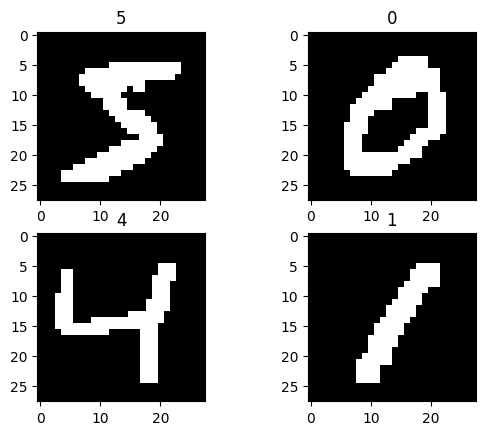

In [70]:
f, axarr = plt.subplots(2,2) # axarr array of axis
axarr[0,0].imshow(imageFormat(x_train[0]),label="1111")
axarr[0,0].title.set_text(np.argmax(y_train[0]))
axarr[0,1].imshow(imageFormat(x_train[1]),label="1111")
axarr[0,1].title.set_text(np.argmax(y_train[1]))
axarr[1,0].imshow(imageFormat(x_train[2]),label="1111")
axarr[1,0].title.set_text(np.argmax(y_train[2]))
axarr[1,1].imshow(imageFormat(x_train[3]),label="1111")
axarr[1,1].title.set_text(np.argmax(y_train[3]))

In [71]:
resnet = ResNet50(include_top=False,  pooling='none', input_shape=IMAGE_SIZE +[3],  weights='imagenet')

In [72]:
cfg = resnet.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 28, 28, 1) #can accept input data of the defined batch size
resnet_model = Model.from_config(cfg) 

In [73]:
for layers in resnet.layers:
    layers.trainable= False

In [74]:
#Taking the output of the last convolution block in ResNet50
X=Flatten()(resnet.output)
# Adding a fully connected layer having 10 neurons
no_classes=10
prediction=Dense(no_classes, activation='softmax',name="Abhishek_layer")(X) 

In [75]:
# Model to be trained
model=Model(inputs=resnet.input, outputs=prediction)

In [76]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [77]:
#set what cost and optimization method to use for our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import  to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import imageio

In [81]:
from tensorflow.keras.datasets import mnist

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [82]:
#reshaping x_test
X = X_test.reshape((10000, 28, 28, 1))
X = X.repeat(3, -1)  # repeat the last (-1) dimension three times
x_test = tf.convert_to_tensor(X)
x_test.shape
# assert x_test.shape == (10000, 28, 28, 3)

TensorShape([10000, 28, 28, 3])

In [83]:
#reshaping x_train
X = X_train.reshape((60000, 28, 28, 1))
X = X.repeat(3, -1)  # repeat the last (-1) dimension three times
x_train = tf.convert_to_tensor(X)
assert x_train.shape == (60000, 28, 28, 3)

In [87]:
def save_imgs(path:Path, data, labels):
    for label in np.unique(labels):
        (path/str(label)).mkdir(parents=True,exist_ok=True)
    for i in range(len(data)):
        if(len(labels)!=0):
            imageio.imsave( str( path/str(labels[i])/(str(i)+'.jpg') ), data[i])
        else:
            imageio.imsave( str( path/(str(i)+'.jpg') ), data[i])

NameError: name 'Path' is not defined